## Assignment 1
### Submission by: Gurbaaz Singh Nandra | 190349

### Necessary Imports

In [2]:
from qiskit import QuantumCircuit, Aer, assemble, execute, BasicAer
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram
import numpy as np

### Task 0:                                           

#### i) Create swap circuit without using inbuilt swap function.                                                 (5)

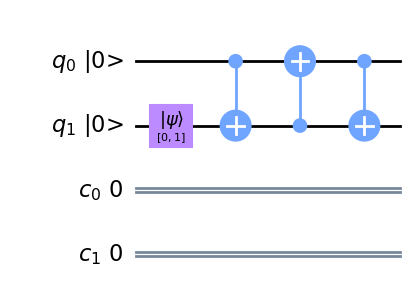

In [3]:
circuit0 = QuantumCircuit(2, 2)

# circuit0.initialize([1, 0], 0) # Apply initialisation operation to the 0th qubit: initialise to |0>
circuit0.initialize([0, 1], 1) # Apply initialisation operation to the 1st qubit: initialise to |1>

circuit0.cnot(0, 1)
circuit0.cnot(1, 0)
circuit0.cnot(0, 1)

circuit0.draw(initial_state=True, cregbundle=False, output='mpl')
# Alternate approach:
# from qiskit.quantum_info.operators import Operator
# cx0 = Operator([
#     [1, 0, 0, 0],
#     [0, 0, 1, 0],
#     [0, 1, 0, 0],
#     [0, 0, 0, 1]
# ])
# circuit0.unitary(cx0, [0, 1], label='cx')
# circuit0.draw(initial_state=True, cregbundle=False, output='mpl')

#### ii) Visualize your circuit and verify using state-vector simulator. (3)

In [4]:
circuit0.draw(initial_state=True, cregbundle=False, output='mpl')
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circuit0)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

To verify if the qubits are actually swapped, we can also run state-vector simulation on qubits, without the circuit. That should come out to be [0 0 1 0]

In [5]:
circuit0_ = QuantumCircuit(2, 2)

# circuit0_.initialize([1, 0], 0) # Apply initialisation operation to the 0th qubit: initialise to |0>
circuit0_.initialize([0, 1], 1) # Apply initialisation operation to the 1st qubit: initialise to |1>

circuit0_.draw(initial_state=True, cregbundle=False, output='mpl')
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circuit0_)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

#### iii) Measure the qubits using classical registers. (2)

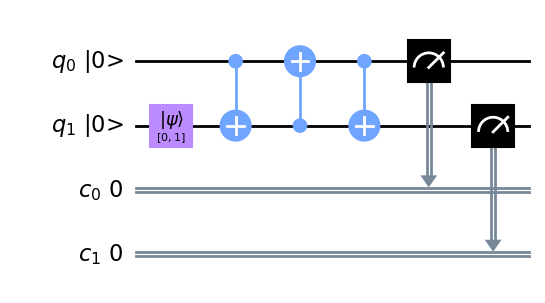

In [6]:
circuit0.measure([0],[0]) 
circuit0.measure([1],[1]) 

circuit0.draw(initial_state=True, cregbundle=False, output='mpl')

{'01': 1000}


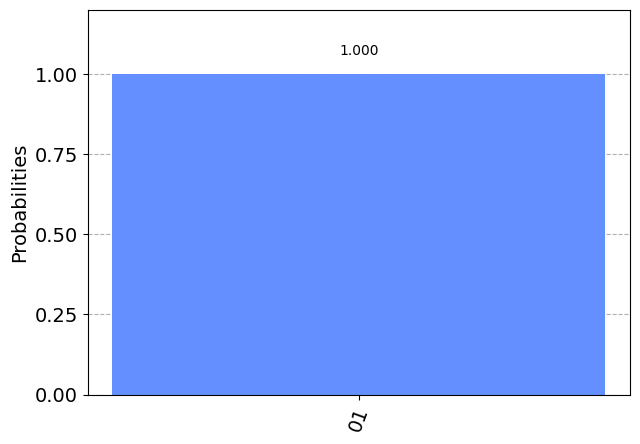

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circuit0, backend = simulator, shots=1000) 
result = job.result()
counts = result.get_counts(circuit0)
print(counts)
plot_histogram(counts)

### Task 1: Create Equal Superposition on 2 qubits. (10)

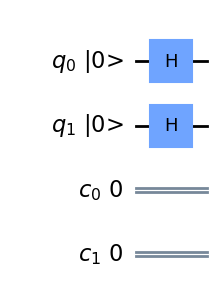

In [8]:
circuit1 = QuantumCircuit(2, 2)

circuit1.h(0)
circuit1.h(1)

circuit1.draw(initial_state=True, cregbundle=False, output='mpl')

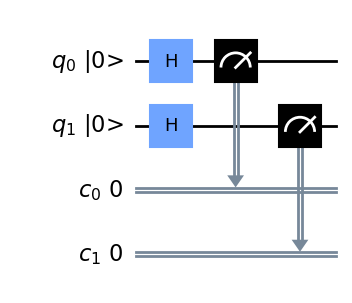

In [9]:
circuit1.measure([0],[0]) 
circuit1.measure([1],[1]) 

circuit1.draw(initial_state=True, cregbundle=False, output='mpl')

{'11': 2543, '10': 2499, '00': 2467, '01': 2491}


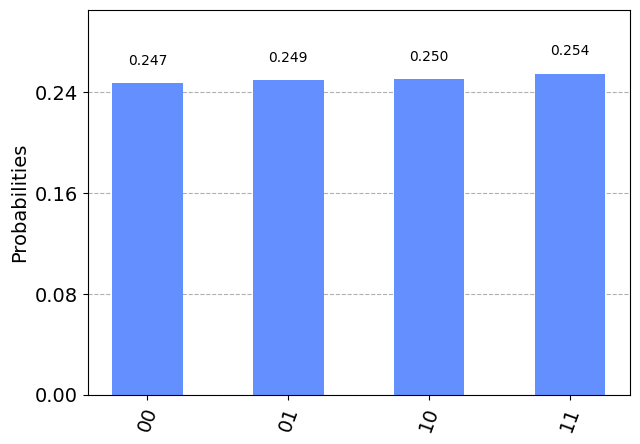

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circuit1, backend = simulator, shots=10000) 
result = job.result()
counts = result.get_counts(circuit1)
print(counts)
plot_histogram(counts)

### Task 2: 

#### i) Create Entangled State $\frac{|00\rangle + |11\rangle}{\sqrt 2}$.   (5)

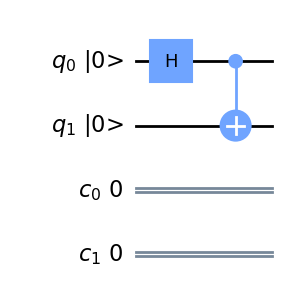

In [11]:
circuit2 = QuantumCircuit(2, 2)

circuit2.h(0)
circuit2.cnot(0, 1)

circuit2.draw(initial_state=True, cregbundle=False, output='mpl')

#### ii) Measure 1st qubit, 2nd qubit, and then both qubit. (5)

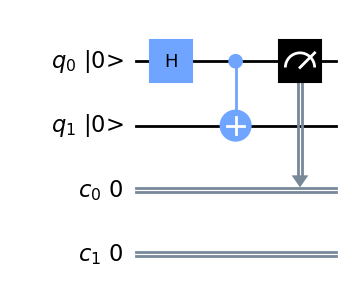

In [12]:
circuit2.measure([0],[0]) 
circuit2.draw(initial_state=True, cregbundle=False, output='mpl')

{'00': 4991, '01': 5009}


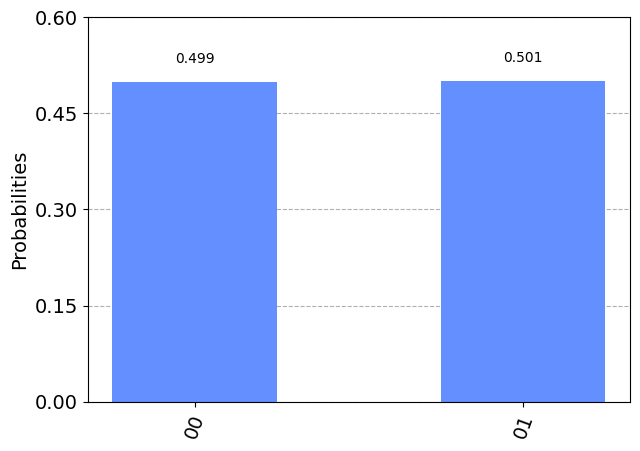

In [13]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circuit2, backend = simulator, shots=10000) 
result = job.result()
counts = result.get_counts(circuit2)
print(counts)
plot_histogram(counts)

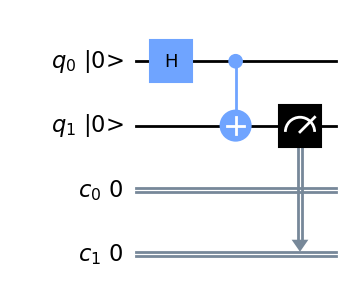

In [14]:
circuit2 = QuantumCircuit(2, 2)

circuit2.h(0)
circuit2.cnot(0, 1)

circuit2.measure([1],[1]) 
circuit2.draw(initial_state=True, cregbundle=False, output='mpl')

{'00': 4996, '10': 5004}


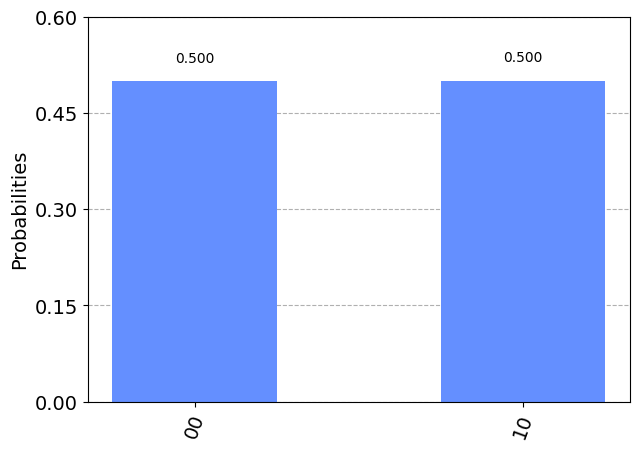

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circuit2, backend = simulator, shots=10000) 
result = job.result()
counts = result.get_counts(circuit2)
print(counts)
plot_histogram(counts)

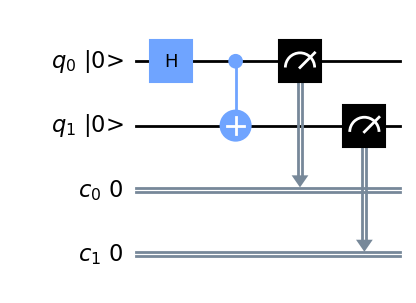

In [16]:
circuit2 = QuantumCircuit(2, 2)

circuit2.h(0)
circuit2.cnot(0, 1)

circuit2.measure([0],[0]) 
circuit2.measure([1],[1]) 
circuit2.draw(initial_state=True, cregbundle=False, output='mpl')

{'11': 4966, '00': 5034}


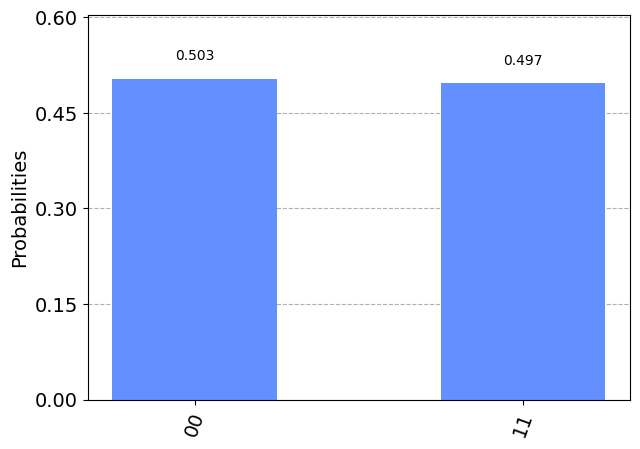

In [17]:
simulator = Aer.get_backend('qasm_simulator')
job =  execute(circuit2, backend = simulator, shots=10000) 
result = job.result()
counts = result.get_counts(circuit2)
print(counts)
plot_histogram(counts)

#### ii) Verify using state-vector simulator that the circuit works (5)

In [18]:
circuit2 = QuantumCircuit(2, 2)

circuit2.h(0)
circuit2.cnot(0, 1)

circuit2.draw(initial_state=True, cregbundle=False, output='mpl')
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circuit2)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

### Task 3: 

#### i) Perform CNOT operation $x, y, z \rightarrow x, y, x \oplus z$, without direct interaction between $x$ and $z$. (10)

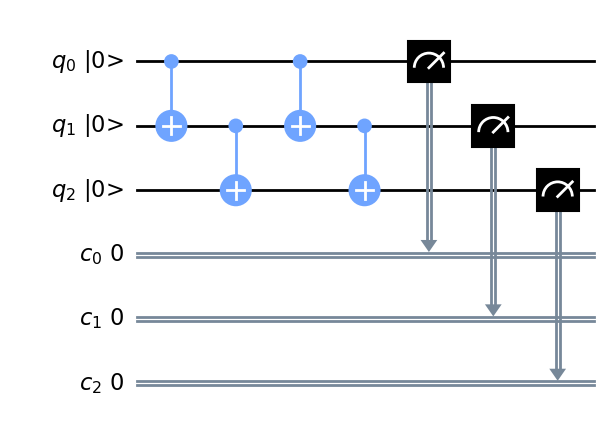

In [19]:
circuit3 = QuantumCircuit(3, 3)

circuit3.cnot(0, 1)
circuit3.cnot(1, 2)
circuit3.cnot(0, 1)
circuit3.cnot(1, 2)

circuit3.measure([0],[0]) 
circuit3.measure([1],[1]) 
circuit3.measure([2],[2]) 

circuit3.draw(initial_state=True, cregbundle=False, output='mpl')

#### ii) Show the action of the circuit as matrix. (5)

In [27]:
circuit3 = QuantumCircuit(3, 3)

circuit3.cnot(0, 1)
circuit3.cnot(1, 2)
circuit3.cnot(0, 1)
circuit3.cnot(1, 2)

#obtain a unitary_simulator
simulator = Aer.get_backend('unitary_simulator')

job = execute(circuit3, simulator, shots=10000)
result = job.result()

print(result.get_unitary(circuit3))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca07e71c-a109-409c-8272-99812e4a09be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>